#              **Use Car Price Prediction Using Linear Regression**:


---
# **Table of Contents**
---

**1.** [**Problem Statement**](#Section1)<br>
**2.** [**Objective**](#Section2)<br>
**3.** [**Installing & Importing Libraries**](#Section3)<br>
  - **3.1** [**Installing Libraries**](#Section31)
  - **3.2** [**Upgrading Libraries**](#Section32)
  - **3.3** [**Importing Libraries**](#Section33)

**4.** [**Data Acquisition & Description**](#Section4)<br>
  - **4.1** [**Data Description**](#Section41)<br>

**5.** [**Data Pre-processing**](#Section5)<br>
  - **5.1** [**Pre-Profiling Report**](#Section51)<br>

**6.** [**Exploratory Data Analysis**](#Section6)<br>
**7.** [**Post Data Processing**](#Section7)<br>
  - **7.1** [**Data Preparation**](#Section71)
  - **7.2** [**Encoding Categorical and Scaling Continuous Features**](#Section72) 
  
**8.** [**Model Development & Evaluation**](#Section8)<br>
**9.** [**Conclusion**](#Section9)<br>


---
<a name = Section1></a>
# **1. Problem Statement**
---
- This dataset contains information about used cars. This data can be used for a lot of purposes such as price prediction to exemplify the use of linear regression in Machine Learning.

- The objective of this challenge is to design a model that give use car price prediciton.

<br> 
<center><img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS0LjTLEBTZsKs7fyo14IWFO8EDcwI5g5UuHQ&usqp=CAU" width="600" height="300" /></center>

---
<a name = Section2></a>
# **2. Objective**
---

- As mentioned above this is a Regression problem in which we need to predict the use car price with selling price as our Target label.

---
<a name = Section3></a>
# **3. Installing & Importing Libraries**
---

<a name = Section31></a>
### **3.1 Installing Libraries**

In [1]:
!pip install -q datascience                                                       # Package that is required by pandas profiling
!pip install -q pandas-profiling  

     |████████████████████████████████| 1.6 MB 5.5 MB/s 


<a name = Section32></a>
### **3.2 Upgrading Libraries**

- **After upgrading** the libraries, you need to **restart the runtime** to make the libraries in sync. 

- Make sure not to execute the cell above (3.1) and below (3.2) again after restarting the runtime.

In [2]:
!pip install -q --upgrade pandas-profiling

     |████████████████████████████████| 268 kB 5.1 MB/s 
     |████████████████████████████████| 62 kB 1.1 MB/s 
     |████████████████████████████████| 102 kB 55.8 MB/s 
     |████████████████████████████████| 690 kB 62.0 MB/s 
     |████████████████████████████████| 4.7 MB 57.4 MB/s 
     |████████████████████████████████| 9.8 MB 52.2 MB/s 
     |████████████████████████████████| 296 kB 71.6 MB/s 


<a name = Section33></a>
### **3.3 Importing Libraries**

In [94]:
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing for panel data analysis
# from pandas_profiling import ProfileReport                          # Import Pandas Profiling (To generate Univariate Analysis) 
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface using matplotlib
import seaborn as sns                                               # Importin seaborm library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.metrics import accuracy_score                          # For calculating the accuracy for the model
from sklearn.preprocessing import StandardScaler                    # Scaling the Data
from sklearn import metrics                                         # metrics calculation
from sklearn.preprocessing import LabelEncoder                      # For categorical variable encoding
from sklearn.model_selection import train_test_split                # To split the data in training and testing part  
from sklearn.metrics import confusion_matrix, classification_report # For verifying model performance using confusion matrix   
from sklearn.linear_model import LinearRegression                   # To create the Linear Regression Model
from sklearn.tree import DecisionTreeRegressor                     # to create a DecisionTreeRegressor

#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once

---
<a name = Section4></a>
# **4. Data Acquisition & Description**
---
- The dataset has been provided by lending club and its description is shown below in the table.


| **Column Name**														| 	**Description** |
|:--|:--|
| Name																	| 	Car Model Name |
| Year																	| 	Bought year of the car |
| Selling_Price															| 	Selling price rate in rupees |
| KM_Driven																| 	Kilimeter driven |
| Fuel																	| 	Type of fuel  |
| Seller_Type															| 	Car seller type  |
| Transmission															| 	Car transmission like manula or automatic |
| Owner																	|	Car owner type individual ro secondary |

In [4]:
car_data= pd.read_csv('/content/Car_details.csv')

In [5]:
car_data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [6]:
print("Car data shape", car_data.shape)

Car data shape (4340, 8)


<a name = Section41></a>
### **4.1 Data Description**

- In this section we will get **description** and **statistics** about the data.

In [7]:
car_data.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


<a name = Section42></a>
### **4.2 Data Information**

 - In this section, we will get **information about the data** and see some observations.


In [8]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


**Observation:**

- We can observe that there is **no null data present** and all **features** have **correct data types**.

<a name = Section5></a>

---
# **5. Data Pre-Processing**
---

<a name = Section51></a>
### **5.1 Pre Profiling Report**

In [9]:
# profile = ProfileReport(df=data)
# profile.to_file(output_file='Pre Profiling Report.html')
# print('Accomplished!')

**Observation:**


- Reports shows that the **number of variables**	in our data is **8**.

- **Number of observations(rows)** is	**4340**.

- **Duplicate rows** are **763**

- There is a **no missing data**.

- For full details checkout the report.

<a name = Section52></a>
### **5.2 Identification & Handling of Missing/Duplicate Data**

- In this section we will **remove duplicate records and year convert into age of car as new feature**.

In [10]:
car_data.drop('name', axis = 1 , inplace = True)          # dropping car name.
car_data['age'] = 2022-car_data['year']                   # creating new feature age based on bought year of the car.
car_data.drop('year',axis = 1, inplace = True)           # dropping year from car data
car_data.drop_duplicates(inplace=True)                    # dropping duplicate records
car_data = car_data[car_data['fuel'] != 'Electric']       # fule has single records so ignored

In [15]:
car_data.isnull().sum()

selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
age              0
dtype: int64

In [16]:
car_data.duplicated().sum()

0

In [14]:
car_data.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,age
0,60000,70000,Petrol,Individual,Manual,First Owner,15
1,135000,50000,Petrol,Individual,Manual,First Owner,15
2,600000,100000,Diesel,Individual,Manual,First Owner,10
3,250000,46000,Petrol,Individual,Manual,First Owner,5
4,450000,141000,Diesel,Individual,Manual,Second Owner,8


<a name = Section6></a>

---
# **6. Exploratory Data Analysis**
---

In [12]:
car_data.skew()

selling_price    5.430836
km_driven        2.557232
age              0.784445
dtype: float64

**Question: What is the frequency and proportion of seller type?**

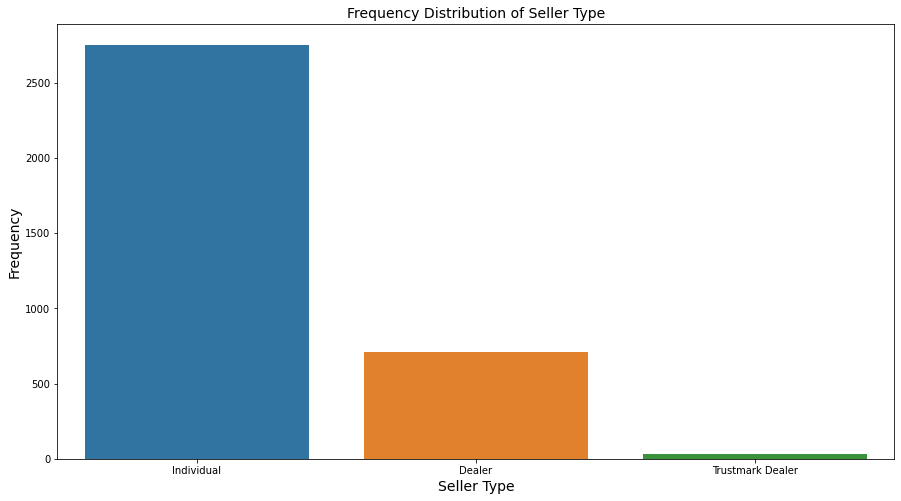

In [13]:
# setting a figure of size of 15 x 8 inches
fig = plt.figure(figsize = [15, 8])

sns.countplot(x = 'seller_type', data = car_data)

# Adding cosmetics to graph
plt.xlabel(xlabel = 'Seller Type', size = 14)
plt.ylabel(ylabel = 'Frequency', size = 14)
plt.title(label = 'Frequency Distribution of Seller Type', size = 14)

# Display the plot
plt.show()

**Question: What is the frequency and proportion of owner?**

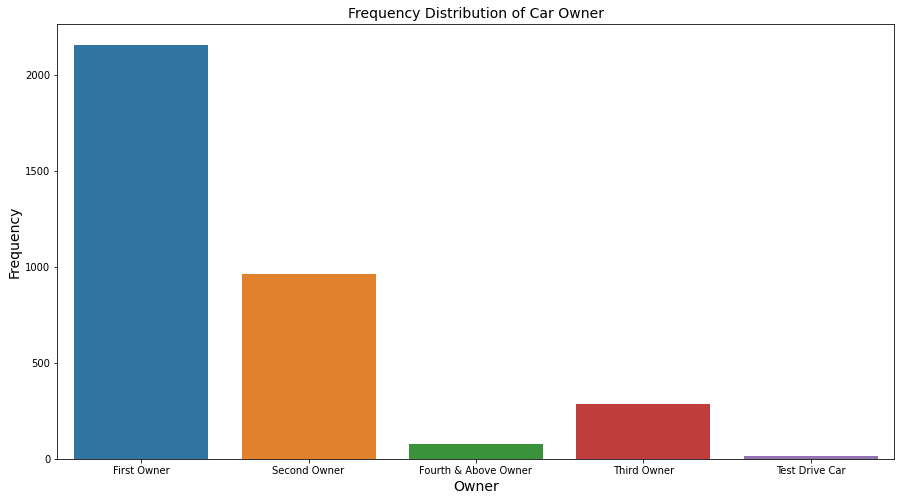

In [18]:
# setting a figure of size of 15 x 8 inches
fig = plt.figure(figsize = [15, 8])

sns.countplot(x = 'owner', data = car_data)

# Adding cosmetics to graph
plt.xlabel(xlabel = 'Owner', size = 14)
plt.ylabel(ylabel = 'Frequency', size = 14)
plt.title(label = 'Frequency Distribution of Car Owner', size = 14)

# Display the plot
plt.show()

**Observation: Looks like most of the car owner want to sell their car in this data.**

**Question: What is the Car kilemeter age wise distribution?**

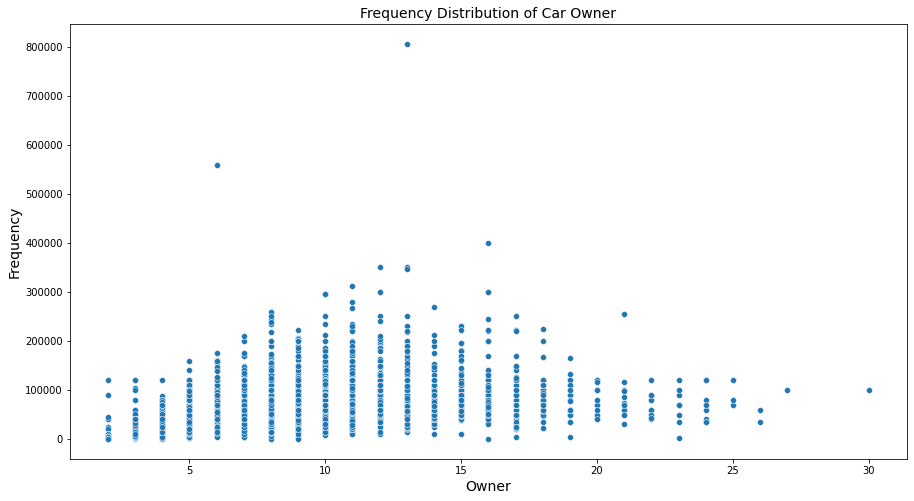

In [21]:
# setting a figure of size of 15 x 8 inches
fig = plt.figure(figsize = [15, 8])

sns.scatterplot(x = car_data['age'], y= car_data['km_driven'])

# Adding cosmetics to graph
plt.xlabel(xlabel = 'Car Age', size = 14)
plt.ylabel(ylabel = 'Kilimeter Driven', size = 14)
plt.title(label = 'Car Kilemeter Driven Age Wise', size = 14)

# Display the plot
plt.show()

**Question: correlation between the car data features?**

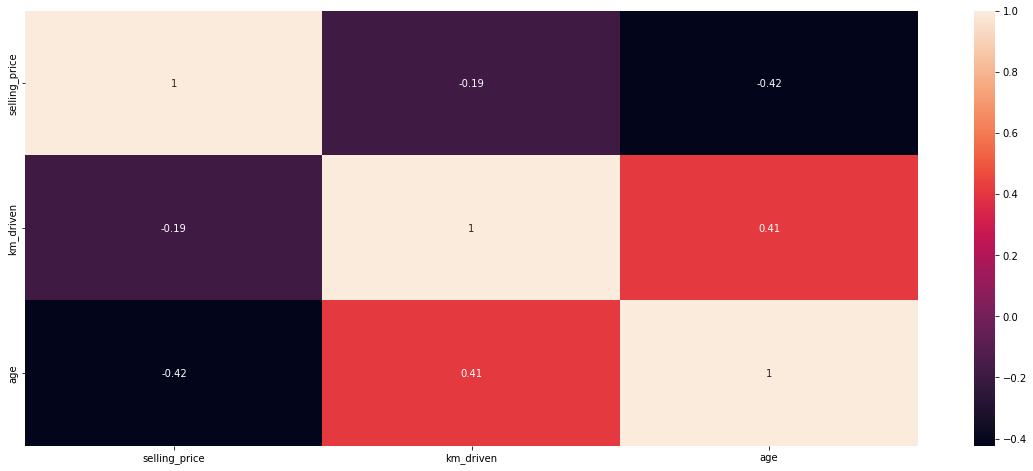

In [25]:
# setting a figure of size of 20 x 7 inches
fig = plt.figure(figsize = [20, 8])

sns.heatmap(car_data.corr(), annot=True)

plt.show()

In [26]:
car_data.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,age
0,60000,70000,Petrol,Individual,Manual,First Owner,15
1,135000,50000,Petrol,Individual,Manual,First Owner,15
2,600000,100000,Diesel,Individual,Manual,First Owner,10
3,250000,46000,Petrol,Individual,Manual,First Owner,5
4,450000,141000,Diesel,Individual,Manual,Second Owner,8


**Question: what is the Car selling price distribution transmission wise?**

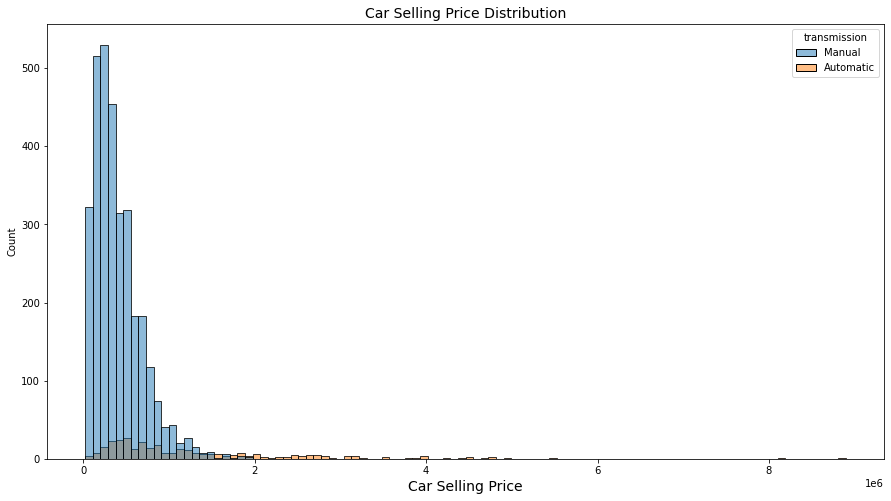

In [34]:
# setting a figure of size of 15 x 8 inches
fig = plt.figure(figsize = [15, 8])

# bins= np.range[1]
sns.histplot(x=car_data['selling_price'], hue=car_data['transmission'], bins=100)

# Adding cosmetics to graph
plt.xlabel(xlabel = 'Car Selling Price', size = 14)
plt.title(label = 'Car Selling Price Distribution', size = 14)

# Display the plot
plt.show()

**Observation: Car selling price for manual transmission is less than 2lac rs while automatice transmission in range between 1 lac to 10 lac.**

<a name = Section7></a>

---
# **7. Post Data Processing**
---


<a name = Section73></a>
### **7.1 Data Preparation**

- **Split** the data into **80:20** inside train_test_split.

- Make sure to set the **random_state = 42**.

---

<details>

**<summary>Hint:</summary>**

- You can use .train_test_split functionality of sklearn package to achieve the objective.

</details>

In [36]:
X = car_data.drop('selling_price', axis = 1)
y = car_data['selling_price']

In [37]:
X.head()

,km_driven,fuel,seller_type,transmission,owner,age
0,70000,Petrol,Individual,Manual,First Owner,15
1,50000,Petrol,Individual,Manual,First Owner,15
2,100000,Diesel,Individual,Manual,First Owner,10
3,46000,Petrol,Individual,Manual,First Owner,5
4,141000,Diesel,Individual,Manual,Second Owner,8


In [38]:
y.head()

0     60000
1    135000
2    600000
3    250000
4    450000
Name: selling_price, dtype: int64

In [39]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3497 entries, 0 to 4339
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   km_driven     3497 non-null   int64 
 1   fuel          3497 non-null   object
 2   seller_type   3497 non-null   object
 3   transmission  3497 non-null   object
 4   owner         3497 non-null   object
 5   age           3497 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 320.3+ KB


In [43]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=42)

In [44]:
print('Training Data Shape:', x_train.shape, y_train.shape)
print('Testing Data Shape:', x_test.shape, y_test.shape)

Training Data Shape: (2797, 6) (2797,)
Testing Data Shape: (700, 6) (700,)


<a name = Section72></a>
### **7.2 Encoding Categorical and Scaling Continuous Features**

In [45]:
x_train_cont = x_train.select_dtypes(exclude = 'object')
x_test_cont = x_test.select_dtypes(exclude = 'object')
x_train_cat = x_train.select_dtypes(include = 'object')
x_test_cat = x_test.select_dtypes(include = 'object')

In [46]:
x_train_cont.head()

,km_driven,age
175,100000,15
1148,26000,4
1939,35000,19
1150,23000,6
1387,25000,6


In [49]:
x_train_cat.head()

,fuel,seller_type,transmission,owner
175,Petrol,Individual,Manual,Second Owner
1148,Petrol,Dealer,Automatic,First Owner
1939,Petrol,Individual,Manual,First Owner
1150,Petrol,Dealer,Manual,First Owner
1387,Petrol,Individual,Manual,First Owner


In [51]:
scaler = StandardScaler()
scaler.fit(x_train_cont)
x_train_cont_s = pd.DataFrame(scaler.transform(x_train_cont), index = x_train_cont.index, columns = x_train_cont.columns)
x_test_cont_s = pd.DataFrame(scaler.transform(x_test_cont),index = x_test_cont.index, columns = x_test_cont.columns)

In [57]:
x_train_cat=x_train_cat.apply(LabelEncoder().fit_transform)
x_test_cat=x_test_cat.apply(LabelEncoder().fit_transform)

In [58]:
x_train_cat.head()

,fuel,seller_type,transmission,owner
175,3,1,1,2
1148,3,0,0,0
1939,3,1,1,0
1150,3,0,1,0
1387,3,1,1,0


In [59]:
x_train_final = pd.concat([x_train_cat,x_train_cont_s], axis =1)
x_test_final = pd.concat([x_test_cat,x_test_cont_s], axis = 1)

In [60]:
x_train_final.head()

,fuel,seller_type,transmission,owner,km_driven,age
175,3,1,1,2,0.633217,1.383605
1148,3,0,0,0,-0.899845,-1.184528
1939,3,1,1,0,-0.713391,2.317471
1150,3,0,1,0,-0.961996,-0.717595
1387,3,1,1,0,-0.920562,-0.717595


In [61]:
x_test_final.head()

,fuel,seller_type,transmission,owner,km_driven,age
1855,1,1,1,0,-0.091880,-0.017195
2955,1,1,1,1,3.181415,1.383605
2662,3,1,1,2,-0.920562,1.850538
2232,3,1,1,2,1.047558,1.150138
325,1,1,1,0,-0.816976,-1.417995


<a name = Section8></a>

---
# **8. Model Development & Evaluation**
---

- In this section, you will develop decision tree-based model.

- Then **analyze the results** obtained and **make observations**.

- For **evaluation purposes** we will **focus** on the **RMSE, R2 and Adjusted R2**.

- **Remember** that we want to **generalize results** i.e. same results or error on testing data as that of training data.`

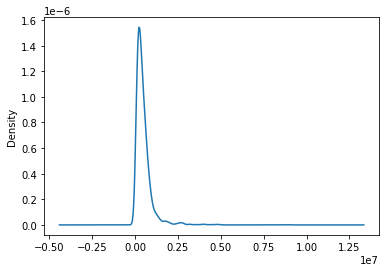

In [62]:
y_train.plot.kde()

In [63]:
tar_var_train = np.log(y_train)
tar_var_test = np.log(y_test)

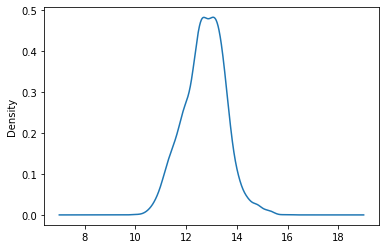

In [64]:
tar_var_train.plot.kde()

**Linear Regression**

In [66]:
lr= LinearRegression()
lr.fit(x_train_final, tar_var_train)

LinearRegression()

In [67]:
tar_var_train_predict= lr.predict(x_train_final)
tar_var_test_predict= lr.predict(x_test_final)

In [70]:
print("intercept = " , lr.intercept_)
print("Coeficient = " , lr.coef_)

intercept =  14.059194481815027
Coeficient =  [-0.23165715 -0.13428675 -0.81262054 -0.02956552 -0.00964579 -0.49187238]


In [85]:
fea_col =list(x_train_final.columns)
# print(fea_col)
fea_col.insert(0,'Intercept')
coef = lr.coef_.tolist()
coef.insert(0, lr.intercept_)
# print(fea_col)
# print(coef)

eq1 = zip(fea_col, coef)

for c1,c2 in eq1:
    print(c1,"=" , c2)

['Intercept', 'fuel', 'seller_type', 'transmission', 'owner', 'km_driven', 'age']
[14.059194481815027, -0.23165715495495087, -0.13428675385053304, -0.8126205367539944, -0.029565516845617933, -0.00964579272590077, -0.4918723789616856]
Intercept = 14.059194481815027
fuel = -0.23165715495495087
seller_type = -0.13428675385053304
transmission = -0.8126205367539944
owner = -0.029565516845617933
km_driven = -0.00964579272590077
age = -0.4918723789616856


In [86]:
RMSE_train = np.sqrt(metrics.mean_squared_error(tar_var_train,tar_var_train_predict))
print('RMSE for training set is {}'.format(RMSE_train))
RMSE_test= np.sqrt(metrics.mean_squared_error(tar_var_test,tar_var_test_predict))
print('RMSE for testing set is {}'.format(RMSE_test))

RMSE for training set is 0.4797087304352981
RMSE for testing set is 0.4926566322430061


In [88]:
MAE_train = metrics.mean_absolute_error(tar_var_train , tar_var_train_predict)
MAE_test = metrics.mean_absolute_error(tar_var_test , tar_var_test_predict)
print("MAE for training set is :{} ". format(MAE_train))
print('MAE for test set is : {}' . format(MAE_test))

MAE for training set is :0.37076745258640825 
MAE for test set is : 0.3774960599182048


In [89]:
r2_train = metrics.r2_score(tar_var_train, tar_var_train_predict)
r2_test = metrics.r2_score(tar_var_test, tar_var_test_predict)
print('R2 for training set is : {}'. format(r2_train))
print('R2 for test set is : {}'. format(r2_test))

R2 for training set is : 0.6579293017973671
R2 for test set is : 0.643556711226503


In [90]:
adjr2_train = 1-(1-r2_train)*(len(tar_var_train)-1)/(len(tar_var_train)-x_train_final.shape[1]-1)   
adjr2_test =1-(1-r2_test)*(len(tar_var_test)-1)/(len(tar_var_test)-x_test_final.shape[1]-1)
print('Adjusted R2 for training set is : {}'. format(adjr2_train))
print('Adjusted R2 for test set is : {}'. format(adjr2_test))

Adjusted R2 for training set is : 0.6571936658872539
Adjusted R2 for test set is : 0.6404706221462131


**Decision Tree Regressor**

In [93]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=4 , min_samples_split= 4)        # Intialize the model
dt.fit(x_train_final, tar_var_train)                                  # Fit the data in model
preds_dt_train = dt.predict(x_train_final)                            # Predict the train data
preds_dt_test = dt.predict(x_test_final)                              # Predict the test data

In [100]:
RMSE_train = np.sqrt(metrics.mean_squared_error(tar_var_train,preds_dt_train))
print('RMSE for training set is {}'.format(RMSE_train))
RMSE_test= np.sqrt(metrics.mean_squared_error(tar_var_test,preds_dt_test))
print('RMSE for testing set is {}'.format(RMSE_test))

RMSE for training set is 0.4823147062681265
RMSE for testing set is 0.5168637982608024


In [97]:
r2_train = metrics.r2_score(tar_var_train, preds_dt_train)
r2_test = metrics.r2_score(tar_var_test, preds_dt_test)
print('R2 for training set is : {}'. format(r2_train))
print('R2 for test set is : {}'. format(r2_test))

R2 for training set is : 0.6542026684539444
R2 for test set is : 0.6076677543290745


<a name = Section9></a>

---
# **9. Conclusion**
---

- We **analyzed different features** and understood their nature and distribution.

- We split the data in a **stratified** fashion and develop a Linear Regression model, Decision Tree Regressor model.

- We observed that the **results** obtained by Linear Regression model better than DecisionTreeRegressor model.